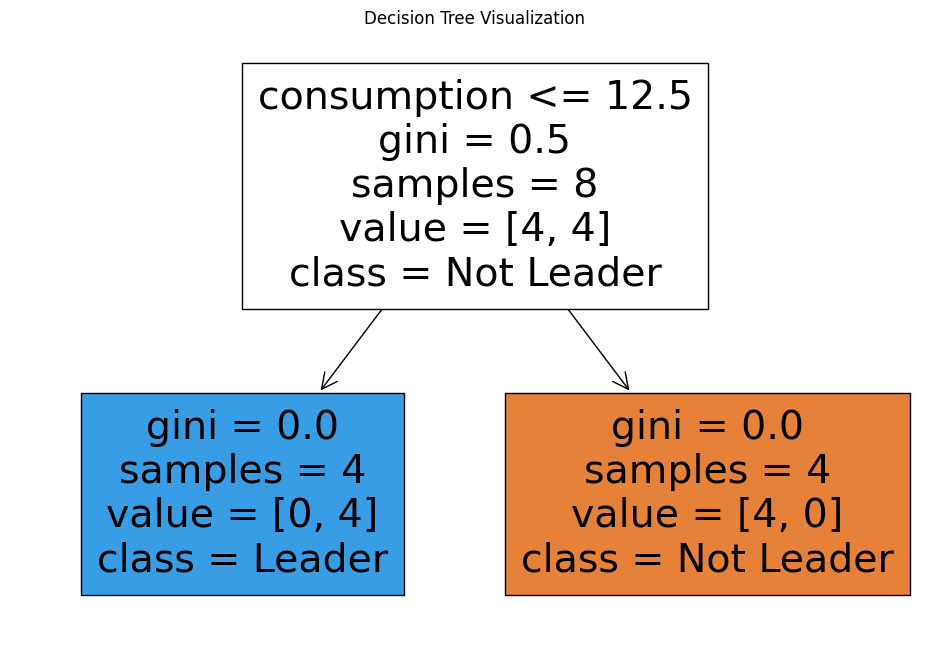

|--- consumption <= 12.50
|   |--- class: 1
|--- consumption >  12.50
|   |--- class: 0

Test Case 1: {'route_distance': 180, 'route_match': 0.9, 'consumption': 12, 'body_characteristics': 2, 'equipment_sensors': 6} -> Predicted leader vehicle: 1
Test Case 2: {'route_distance': 150, 'route_match': 0.85, 'consumption': 15, 'body_characteristics': 1, 'equipment_sensors': 5} -> Predicted leader vehicle: 0
Test Case 3: {'route_distance': 220, 'route_match': 0.88, 'consumption': 14, 'body_characteristics': 3, 'equipment_sensors': 7} -> Predicted leader vehicle: 0
Test Case 4: {'route_distance': 100, 'route_match': 0.95, 'consumption': 10, 'body_characteristics': 1, 'equipment_sensors': 5} -> Predicted leader vehicle: 1
Accuracy on test set: 0.50


In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as plt

# Sample data (Replace this with your actual dataset)
data = {
    'route_distance': [100, 150, 200, 250, 300, 180, 220, 260, 140, 190],
    'route_match': [0.9, 0.8, 0.95, 0.85, 0.92, 0.87, 0.9, 0.86, 0.88, 0.9],
    'consumption': [10, 15, 8, 20, 12, 14, 11, 18, 17, 13],
    'body_characteristics': [1, 2, 1, 3, 2, 2, 1, 3, 1, 2],
    'equipment_sensors': [5, 6, 5, 7, 6, 5, 6, 7, 5, 6],
    'leader_vehicle': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1 indicates leader vehicle
}

# Create DataFrame
df = pd.DataFrame(data)

# Define features and target variable
X = df[['route_distance', 'route_match', 'consumption', 'body_characteristics', 'equipment_sensors']]
y = df['leader_vehicle']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier with max depth to prune the tree
clf = DecisionTreeClassifier(random_state=42, max_depth=3)

# Train the model
clf.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['route_distance', 'route_match', 'consumption', 'body_characteristics', 'equipment_sensors'], class_names=['Not Leader', 'Leader'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

# Print the decision tree as text
tree_rules = export_text(clf, feature_names=['route_distance', 'route_match', 'consumption', 'body_characteristics', 'equipment_sensors'])
print(tree_rules)

# Predicting the leader vehicle for new sets of data
test_cases = [
    {'route_distance': 180, 'route_match': 0.9, 'consumption': 12, 'body_characteristics': 2, 'equipment_sensors': 6},
    {'route_distance': 150, 'route_match': 0.85, 'consumption': 15, 'body_characteristics': 1, 'equipment_sensors': 5},
    {'route_distance': 220, 'route_match': 0.88, 'consumption': 14, 'body_characteristics': 3, 'equipment_sensors': 7},
    {'route_distance': 100, 'route_match': 0.95, 'consumption': 10, 'body_characteristics': 1, 'equipment_sensors': 5}
]

for i, test_case in enumerate(test_cases, 1):
    new_df = pd.DataFrame([test_case])
    prediction = clf.predict(new_df)
    print(f'Test Case {i}: {test_case} -> Predicted leader vehicle: {prediction[0]}')

# Evaluate the model with the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.2f}')
